In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error


# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)


In [4]:
dataset.head(10)

,Passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [9]:
min(dataset.Passengers)

104

In [20]:
look_back = 1 

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
dataset = scaler.fit_transform(dataset)

In [13]:
dataset[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [14]:
len(dataset)

141

In [16]:
training_size = 100
train, test = dataset[0:training_size, :],dataset[training_size:len(dataset),:]

In [17]:
train.shape

(100, 1)

In [18]:
test.shape

(41, 1)

In [21]:
import numpy as np
def create_x_y(data,look_back):
  x_data, y_data = [],[]
  for i in range(len(data) - look_back - 1):
    iv = data[i:(i+look_back),0]
    dv = data[i + look_back,0]
    x_data.append(iv)
    y_data.append(dv)
  x_data = np.array(x_data)
  y_data = np.array(y_data)
  return x_data,y_data


In [25]:
x_train,y_train = create_x_y(train,1)

In [28]:
x_test,y_test = create_x_y(test,1)

In [31]:
# sequestial models usually take data interms of 3d array

In [36]:
x_train.shape

(98, 1)

In [37]:
x_train = np.reshape(x_train,(x_train.shape[0], 1, x_train.shape[1]))

In [38]:
x_train.shape

(98, 1, 1)

In [39]:
x_test.shape

(39, 1)

In [40]:
x_test = np.reshape(x_test,(x_test.shape[0], 1, x_test.shape[1]))

In [41]:
x_test.shape

(39, 1, 1)

In [44]:
from tensorflow.keras.models import Sequential

In [46]:
model = Sequential() #brain without neurons

In [48]:
from tensorflow.keras.layers import LSTM,Dense

In [49]:
model.add(LSTM(4, input_shape = (1, look_back), return_sequences=True))
model.add(LSTM(4,return_sequences=True))
model.add(LSTM(4)) 

model.add(Dense(1)) 


In [52]:
model.compile(loss = 'mean_squared_error', optimizer = "adam")

In [53]:
model.fit(x_train,y_train, epochs = 100, batch_size = 1)

Epoch 1/100
98/98 [==============================] - 4s 3ms/step - loss: 0.0426
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0154
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 8/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 9/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 10/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 11/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 12/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 13/100
98/98 [=================

In [54]:
y_pred = model.predict(x_test)

2/2 [==============================] - 1s 5ms/step


In [56]:
y_pred[:5]

array([[0.47682333],
       [0.5678834 ],
       [0.6156455 ],
       [0.6176837 ],
       [0.5455043 ]], dtype=float32)

In [58]:
ypred = scaler.inverse_transform(y_pred)

In [59]:
ypred[:5]

array([[350.9945 ],
       [398.1636 ],
       [422.9044 ],
       [423.96017],
       [386.57123]], dtype=float32)

In [60]:
y_test[:5] 

array([0.61389961, 0.6969112 , 0.7007722 , 0.57915058, 0.46911197])

In [62]:
ytest = scaler.inverse_transform([y_test])

In [63]:
ytest

array([[422., 465., 467., 404., 347., 305., 336., 340., 318., 362., 348.,
        363., 435., 491., 505., 404., 359., 310., 337., 360., 342., 406.,
        396., 420., 472., 548., 559., 463., 407., 362., 405., 417., 391.,
        419., 461., 472., 535., 622., 606.]])

In [64]:
ypred[:5]

array([[350.9945 ],
       [398.1636 ],
       [422.9044 ],
       [423.96017],
       [386.57123]], dtype=float32)

In [65]:
import matplotlib.pyplot as plt

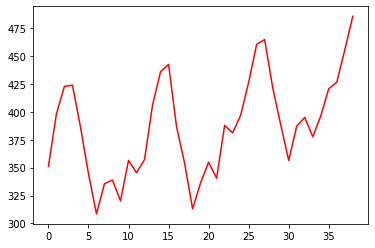

In [66]:
plt.plot(ypred, c = 'r')

In [68]:
ytest.shape

(1, 39)

In [69]:
ytest.T.shape

(39, 1)

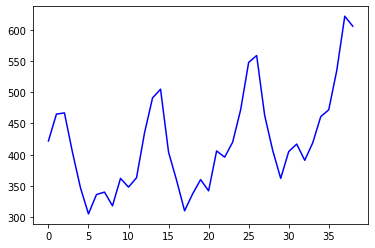

In [71]:
plt.plot(ytest.T, c = 'b')

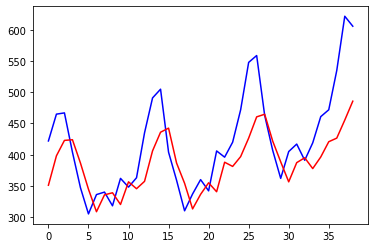

In [72]:
plt.plot(ytest.T, c = 'b')
plt.plot(ypred, c = 'r')


In [73]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest.T,ypred)

48.44728205754207

In [74]:
ypred.shape

(39, 1)

In [75]:
ytest.shape


(1, 39)